In [46]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import square
import math
from numpy.fft import fft, ifft, fftfreq
import time

In [47]:
class MyPlotter:
    def __init__(self, size : tuple, fontsize=12, **kwargs):
        self.fig, self.axs = plt.subplots(*size, **kwargs)
        self.fontsize = fontsize
        
    def plot(self, ax_idx : tuple, x, y, title=None, xlabel=None, ylabel=None, xlim=None, ylim=None, grid : bool = False):
        self.axs[ax_idx].plot(x, y)
        if title is not None:
            self.axs[ax_idx].set_title(title, fontsize=self.fontsize)
        if xlabel is not None:
            self.axs[ax_idx].set_xlabel(xlabel, fontsize=self.fontsize)
        if ylabel is not None:
            self.axs[ax_idx].set_ylabel(ylabel, fontsize=self.fontsize)
        if xlim is not None: 
            self.axs[ax_idx].set_xlim(xlim)
        if ylim is not None:
            self.axs[ax_idx].set_ylim(ylim)
        if grid: 
            self.axs[ax_idx].grid()

In [48]:
def cosinus(t, frequency, amplitude):
    w = frequency * 2 * np.pi
    return np.cos(w * t) * amplitude

def gauss_noise(signal, noise_level):
    return signal + np.random.standard_normal(signal.shape) * noise_level

def low_pass_transfer_function(w, cutoff_freq, n):
    return 1 / (1 + (w / cutoff_freq) ** (2 * n))

def high_pass_transfer_function(w, cutoff_freq):
    return w**2 / (-(cutoff_freq**2) + math.sqrt(2) * cutoff_freq * w * 1j + 1)

def normalized_transfer_function(s):
    return 1 / (-(s**2) + 1j * math.sqrt(2) * s + 1)

def band_pass_transfer_function(w, cutoff_freq):
    return low_pass_transfer_function(w, cutoff_freq, 2) * high_pass_transfer_function(w, cutoff_freq)

def block_pass_transfer_function(w, cutoff_freq):
    return low_pass_transfer_function(w, cutoff_freq, 2) + high_pass_transfer_function(w, cutoff_freq)

def apply_filter(signal, transfer_func, **kwargs):
    spectrum = fft(signal)
    frequencies = fftfreq(len(signal), 1.0 / sample_rate)
    filtered_spectrum = spectrum * transfer_func(frequencies, **kwargs)
    filtered_signal = ifft(filtered_spectrum).real
    return filtered_signal

sample_rate = 1000.0  
duration = 1.0 
noise_level = 1
amplitude = 2
num_samples = int(sample_rate * duration)

t = np.linspace(0, duration, num_samples, endpoint=False)
tf = fftfreq(num_samples, 1 / sample_rate)

y = gauss_noise(
    cosinus(t, frequency=50, amplitude=amplitude) + 
    cosinus(t, frequency=150, amplitude=amplitude) + 
    cosinus(t, frequency=450, amplitude=amplitude), 
                noise_level=noise_level)

y_fft = fft(y)

row = np.arange(0, 500, 0.01)

low_freq_filtered_signal = apply_filter(y, transfer_func=low_pass_transfer_function, cutoff_freq=70, n=2)
lff_spectrum = np.abs(fft(low_freq_filtered_signal))
lff_visualization = np.abs(low_pass_transfer_function(row, 70, 2))

high_freq_filtered_signal = apply_filter(y, transfer_func=high_pass_transfer_function, cutoff_freq=70)
hff_spectrum = np.abs(fft(high_freq_filtered_signal))
hff_visualization = np.abs(high_pass_transfer_function(row, 70))

band_filtered_signal = apply_filter(y, transfer_func=band_pass_transfer_function, cutoff_freq=150)
bff_spectrum = np.abs(fft(band_filtered_signal))
bff_visualization = np.abs(band_pass_transfer_function(row, 150))

block_filtered_signal = apply_filter(y, transfer_func=block_pass_transfer_function, cutoff_freq=150)
blff_spectrum = np.abs(fft(block_filtered_signal))
blff_visualization = np.abs(block_pass_transfer_function(row, 150))

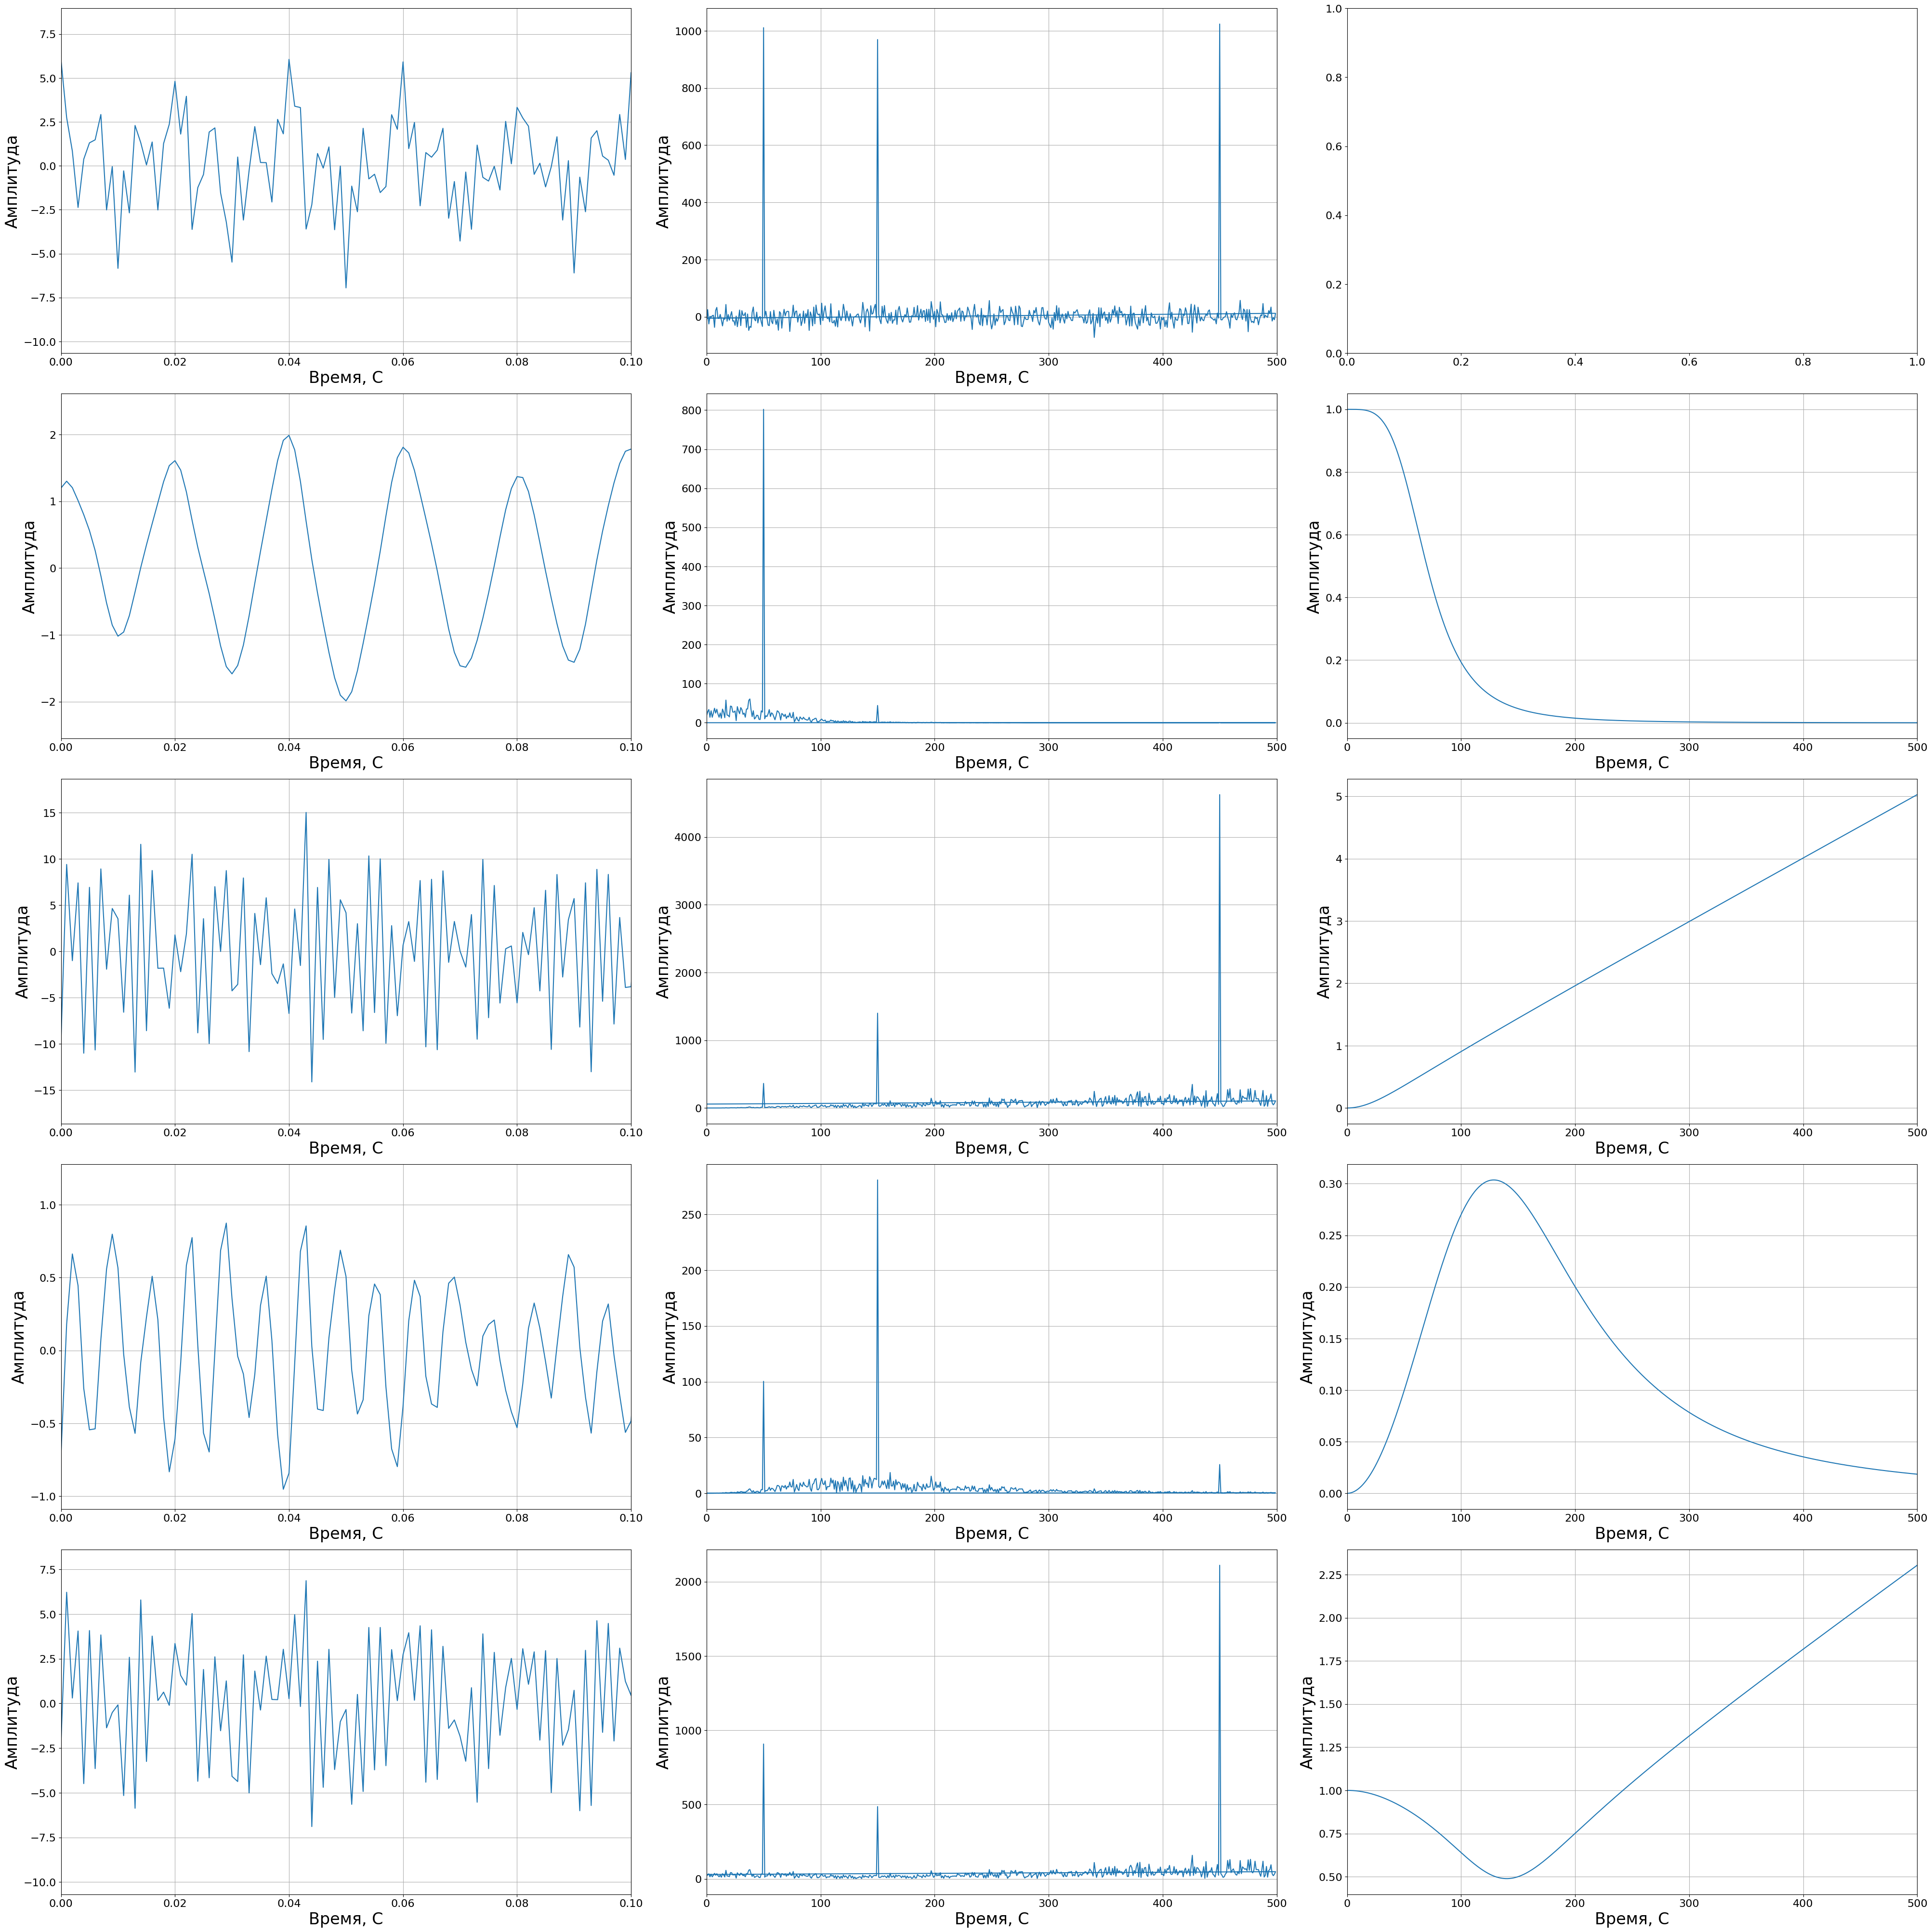

In [49]:

plt.rcParams.update({'font.size': 16})
plotter = MyPlotter((5, 3), figsize=(40, 40), layout="constrained", fontsize=24)

plotter.plot((0, 0), t, y, 
             xlabel='Время, С',
             ylabel='Амплитуда',
             xlim=[0, 0.1],
             grid=True)

plotter.plot((0, 1), tf, y_fft, 
             xlabel='Время, С',
             ylabel='Амплитуда',
             xlim=[0, 500],
             grid=True)

plotter.plot((1, 0), t, low_freq_filtered_signal, 
             xlabel='Время, С',
             ylabel='Амплитуда',
             xlim=[0, 0.1],
             grid=True)

plotter.plot((1, 1), tf, lff_spectrum, 
             xlabel='Время, С',
             ylabel='Амплитуда',
             xlim=[0, 500],
             grid=True)

plotter.plot((1, 2), row, lff_visualization, 
             xlabel='Время, С',
             ylabel='Амплитуда',
             xlim=[0, 500],
             grid=True)

plotter.plot((2, 0), t, high_freq_filtered_signal, 
             xlabel='Время, С',
             ylabel='Амплитуда',
             xlim=[0, 0.1],
             grid=True)

plotter.plot((2, 1), tf, hff_spectrum, 
             xlabel='Время, С',
             ylabel='Амплитуда',
             xlim=[0, 500],
             grid=True)

plotter.plot((2, 2), row, hff_visualization, 
             xlabel='Время, С',
             ylabel='Амплитуда',
             xlim=[0, 500],
             grid=True)

plotter.plot((3, 0), t, band_filtered_signal, 
             xlabel='Время, С',
             ylabel='Амплитуда',
             xlim=[0, 0.1],
             grid=True)

plotter.plot((3, 1), tf, bff_spectrum, 
             xlabel='Время, С',
             ylabel='Амплитуда',
             xlim=[0, 500],
             grid=True)

plotter.plot((3, 2), row, bff_visualization, 
             xlabel='Время, С',
             ylabel='Амплитуда',
             xlim=[0, 500],
             grid=True)

plotter.plot((4, 0), t, block_filtered_signal, 
             xlabel='Время, С',
             ylabel='Амплитуда',
             xlim=[0, 0.1],
             grid=True)

plotter.plot((4, 1), tf, blff_spectrum, 
             xlabel='Время, С',
             ylabel='Амплитуда',
             xlim=[0, 500],
             grid=True)

plotter.plot((4, 2), row, blff_visualization, 
             xlabel='Время, С',
             ylabel='Амплитуда',
             xlim=[0, 500],
             grid=True)

plt.show()


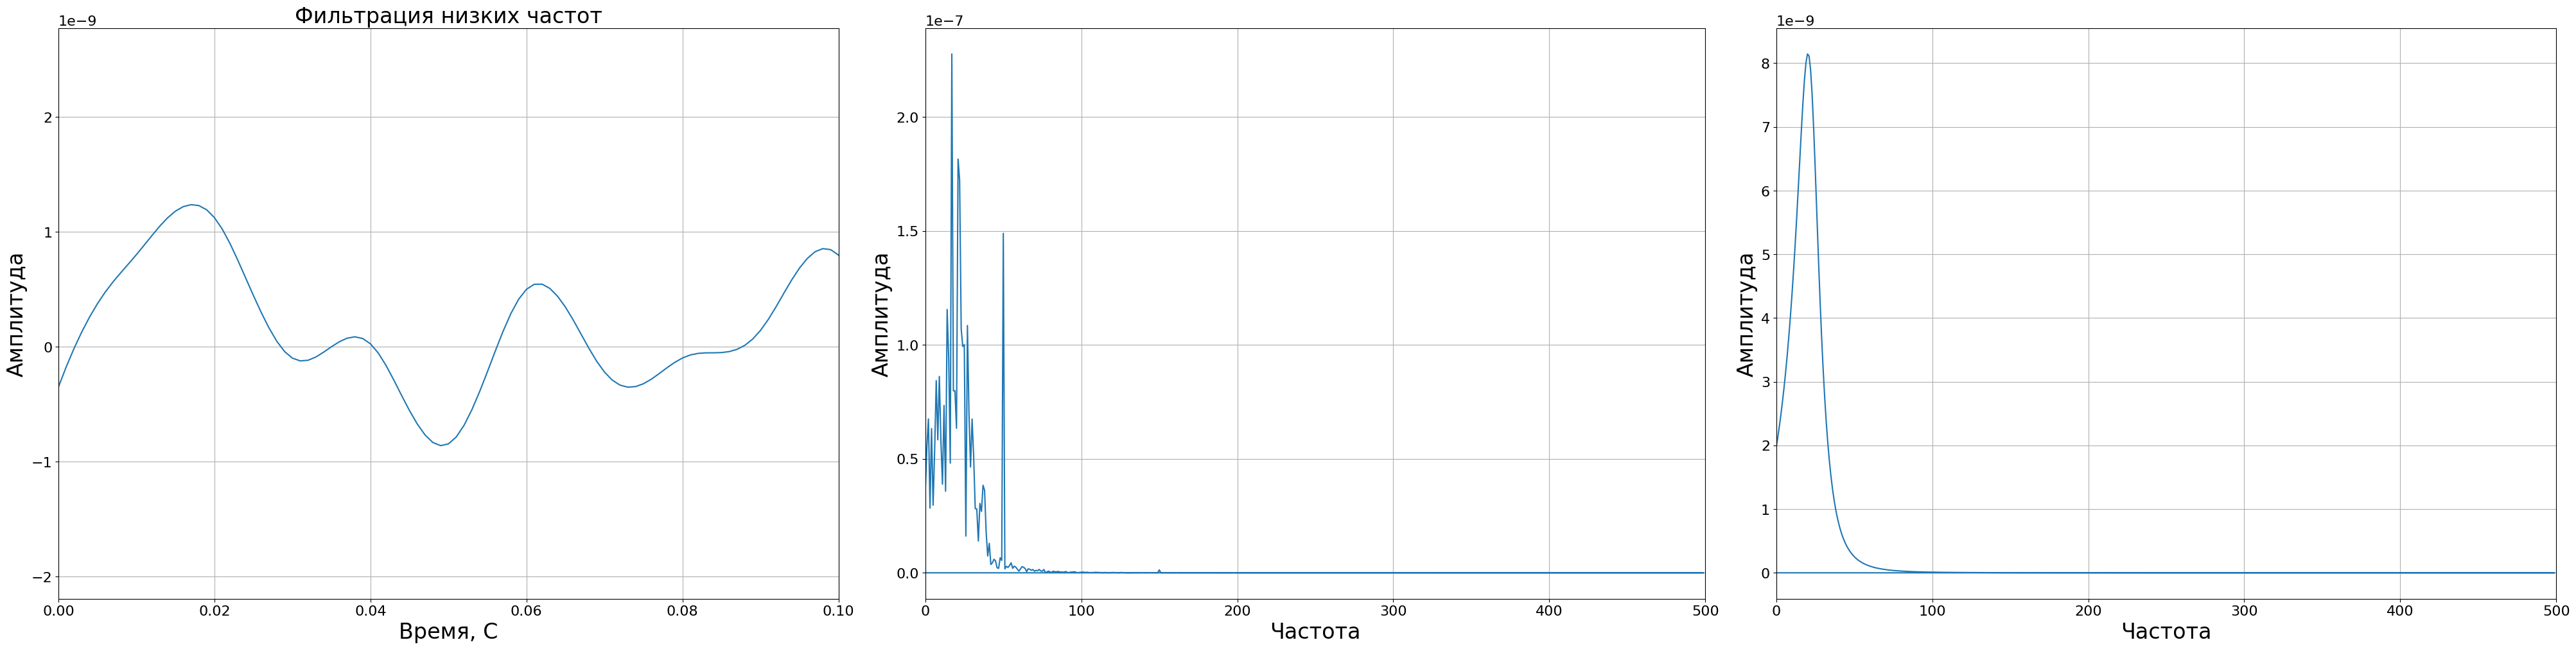

In [50]:
def butterworth_filter_n_order(frequencies, cutoff_frequency, order):
    poles = []
    for k in range(order):
        real_part = cutoff_frequency * np.cos((2 * k + order - 1) * np.pi / (2 * order))
        imag_part = cutoff_frequency * np.sin((2 * k + order - 1) * np.pi / (2 * order))
        poles.append(complex(real_part, imag_part))
    s = 2j * np.pi * frequencies
    denominator = np.ones_like(s)
    for pole in poles:
        denominator *= s - pole
    return np.abs(1 / denominator)
        

low_freq_filtered_signal = apply_filter(y, transfer_func=butterworth_filter_n_order, cutoff_frequency=150, order=4)
lff_spectrum = np.abs(fft(low_freq_filtered_signal))
lff_visualization = np.abs(butterworth_filter_n_order(tf, cutoff_frequency=150, order=4))

plt.rcParams.update({'font.size': 16})
plotter = MyPlotter((1, 3), figsize=(40, 10), layout="constrained", fontsize=24)

plotter.plot((0), t, low_freq_filtered_signal, 
             title="Фильтрация низких частот",
             xlabel='Время, С',
             ylabel='Амплитуда',
             xlim=[0, 0.1],
             grid=True)

plotter.plot((1), tf, lff_spectrum, 
             xlabel='Частота',
             ylabel='Амплитуда',
             xlim=[0, 500],
             grid=True)

plotter.plot((2), tf, lff_visualization, 
             xlabel='Частота',
             ylabel='Амплитуда',
             xlim=[0, 500],
             grid=True)